# Analyse output from test runs using different horizontal viscosity
see https://cosima-recipes.readthedocs.io/en/latest/tutorials/Make_Your_Own_Database.html#gallery-tutorials-make-your-own-database-ipynb

and https://cosima-recipes.readthedocs.io/en/latest/documented_examples/Annually_Averaged_Scalar_Timeseries.html#gallery-documented-examples-annually-averaged-scalar-timeseries-ipynb

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import glob
from collections import OrderedDict

In [2]:
db = 'cc_database.db'
session = cc.database.create_session(db)
# cc.database.build_index(['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091'], session, update=True)
cc.database.build_index(['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_k_smag_iso3'], session, update=True)
cc.database.build_index(['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_OFAM3visc'], session, update=True)

0it [00:00, ?it/s]

Indexing experiment: 01deg_jra55v13_ryf9091_k_smag_iso3



0it [00:00, ?it/s]

Indexing experiment: 01deg_jra55v13_ryf9091_OFAM3visc


0

In [3]:
refsession = cc.database.create_session()
ryf01refsession = cc.database.create_session('/g/data/ik11/databases/ryf9091.db')

In [4]:
glob.glob('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091*')

['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_ndte500',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_0Kv',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_5Kv',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_OFAM3visc',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_tides_rayleigh',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_ndte240',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_tides',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_k_smag_iso3',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_tides_v0',
 '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_ndte60']

In [5]:

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [6]:
# replace contents of exptdata.exptdict
for ekey in list(exptdata.exptdict.keys()):
    del exptdata.exptdict[ekey]

In [7]:
for ekey in [ '01deg_jra55v13_ryf9091_k_smag_iso3', '01deg_jra55v13_ryf9091_OFAM3visc' ]:
    if ekey not in exptdata.exptdict:
        print('Adding '+ekey)
        exptdata.exptdict[ekey] = dict()
        e = exptdata.exptdict[ekey]
        e['expt'] = ekey
        if ekey.find('_1deg') >= 0:
            e['model'] = 'access-om2'
        elif ekey.find('_025deg') >= 0:
            e['model'] = 'access-om2-025'
        else:
            e['model'] = 'access-om2-01'
        e['exptdir'] = '/g/data/v45/aek156/data/access-om2/'+e['expt']
        e['desc'] = ekey
        e['time_units'] = None
        e['offset'] = None
exptdata.exptdict['01deg_jra55v13_ryf9091_k_smag_iso3']['ref'] = '01deg_jra55v13_ryf9091'
exptdata.exptdict['01deg_jra55v13_ryf9091_OFAM3visc']['ref'] = '01deg_jra55v13_ryf9091'

Adding 01deg_jra55v13_ryf9091_k_smag_iso3
Adding 01deg_jra55v13_ryf9091_OFAM3visc


In [8]:
figdir = ''
def savefigure(fname):
#     plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [9]:
def load_data(variable,ncfile):
    for ekey in exptdata.exptdict.keys():
        e = exptdata.exptdict[ekey]
        if ncfile not in e:
            e[ncfile] = OrderedDict.fromkeys('')
        if variable not in e[ncfile]:
            print(ekey)
            e[ncfile][variable] = cc.querying.getvar(e['expt'], variable, session, ncfile=ncfile)
        refncfile = e['ref']+' '+ncfile
        if refncfile not in e:
            e[refncfile] = OrderedDict.fromkeys('')
        if variable not in e[refncfile]:
            print(e['ref'])
            if e['ref'] == '01deg_jra55v13_ryf9091':
                sess = ryf01refsession
            else:
                sess = refsession
            e[refncfile][variable] = cc.querying.getvar(e['ref'], variable, sess, ncfile=ncfile)

## checking scalar timeseries
Note: initial condition problem for some reference runs: https://github.com/COSIMA/access-om2/issues/39

Also `01deg_jra55v13_iaf` initial condition was an RYF spinup

In [10]:
variables = ['temp_global_ave', 'temp_surface_ave', 'salt_surface_ave', 'ke_tot']
# variables = ['temp_global_ave']
for v in variables:
    load_data(v,'ocean_scalar.nc')

01deg_jra55v13_ryf9091_k_smag_iso3
01deg_jra55v13_ryf9091
01deg_jra55v13_ryf9091_OFAM3visc
01deg_jra55v13_ryf9091
01deg_jra55v13_ryf9091_k_smag_iso3
01deg_jra55v13_ryf9091
01deg_jra55v13_ryf9091_OFAM3visc
01deg_jra55v13_ryf9091
01deg_jra55v13_ryf9091_k_smag_iso3
01deg_jra55v13_ryf9091
01deg_jra55v13_ryf9091_OFAM3visc
01deg_jra55v13_ryf9091
01deg_jra55v13_ryf9091_k_smag_iso3
01deg_jra55v13_ryf9091
01deg_jra55v13_ryf9091_OFAM3visc
01deg_jra55v13_ryf9091


## checking surface fields at final time

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_lau

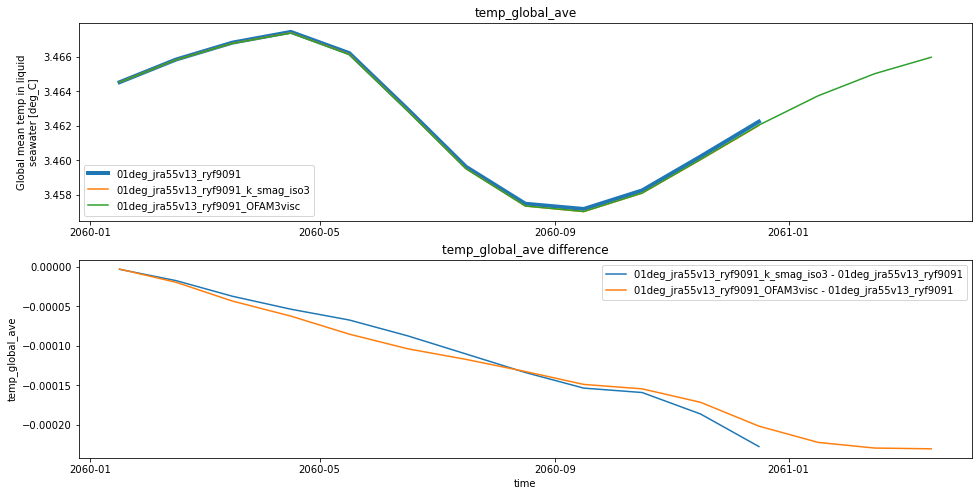

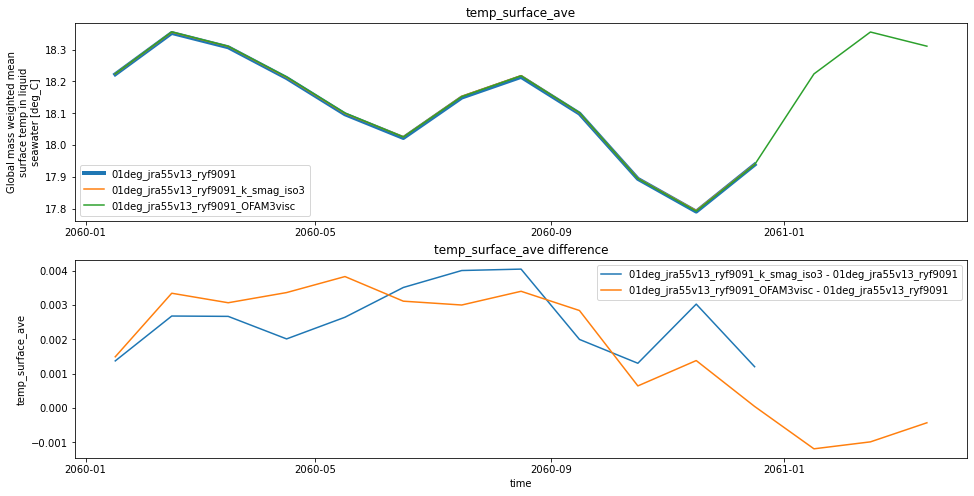

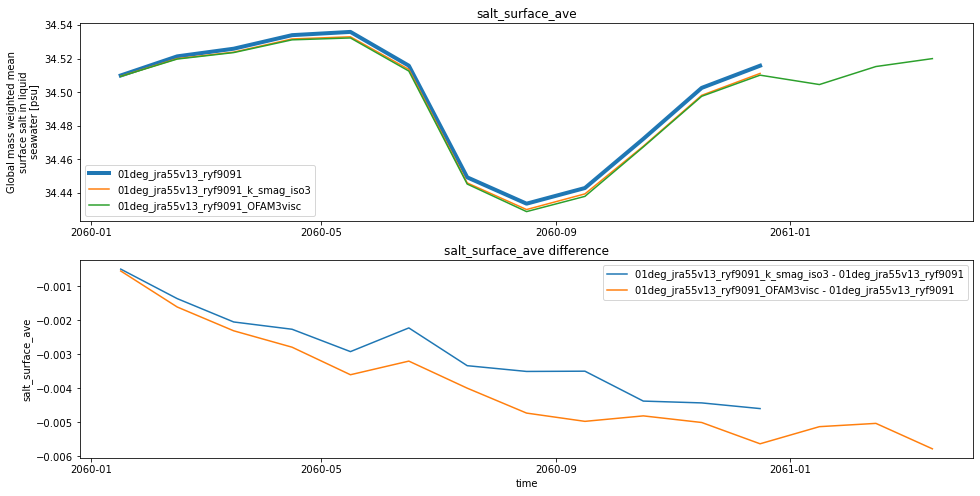

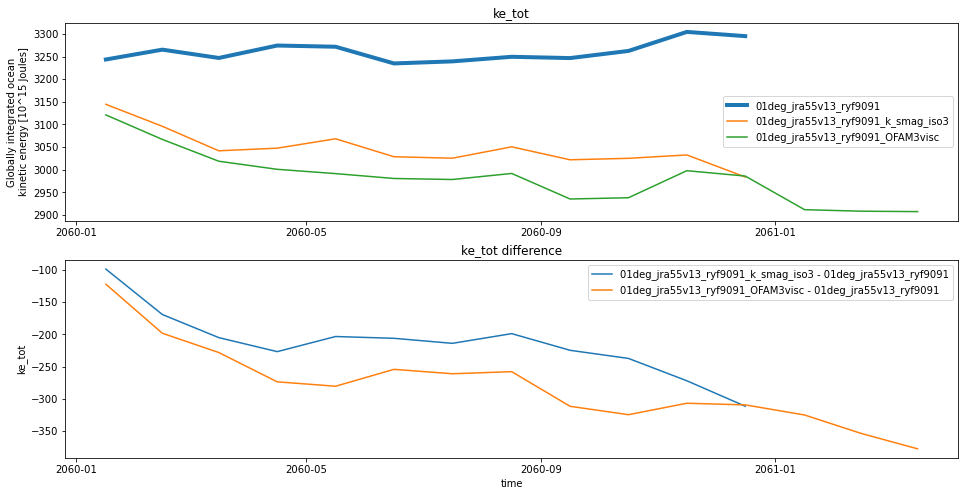

In [11]:
for v in variables:
    plt.figure(figsize=(16,8))
    for i,ekey in enumerate(exptdata.exptdict.keys()):
        e = exptdata.exptdict[ekey]
        ref = e[e['ref']+' '+'ocean_scalar.nc'][v]
        new = e['ocean_scalar.nc'][v]
        tmin = max(ref.time.min().values, new.time.min().values)
        tmax = min(ref.time.max().values, new.time.max().values)
        ref = ref.sel(time=slice(tmin, tmax))
        new = new.sel(time=slice(tmin, tmax))
        
        plt.subplot(2,1,1)
        if i==0:
            ref.plot(label=e['ref'],linewidth=4)
        new.plot(label=e['desc'])
        plt.title(v)
        plt.legend(loc='best')
        plt.xlabel('')
        
        plt.subplot(2,1,2)
        (new-ref).plot(label=e['desc']+' - '+e['ref'])
        plt.title(v+' difference')
        plt.legend(loc='best')

In [ ]:
STOPHERE

In [ ]:
variables2d = ['pme_river', 'river', 'evap', 'sfc_salt_flux_coupler', 'net_sfc_heating', 'tau_x', 'tau_y']
# variables2d = ['pme_river']
# variables2d = ['pme_river', 'river']
for v in variables2d:
    load_data(v, 'ocean_month.nc')

1deg_jra55_iaf_CHUCKME
1deg_jra55v13_iaf_spinup1_B1
1deg_jra55_ryf_CHUCKME
1deg_jra55_ryf9091_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


1deg_jra55_iaf_CHUCKME
1deg_jra55v13_iaf_spinup1_B1
1deg_jra55_ryf_CHUCKME
1deg_jra55_ryf9091_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


1deg_jra55_iaf_CHUCKME
1deg_jra55v13_iaf_spinup1_B1
1deg_jra55_ryf_CHUCKME
1deg_jra55_ryf9091_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


1deg_jra55_iaf_CHUCKME
1deg_jra55v13_iaf_spinup1_B1
1deg_jra55_ryf_CHUCKME
1deg_jra55_ryf9091_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


1deg_jra55_iaf_CHUCKME
1deg_jra55v13_iaf_spinup1_B1
1deg_jra55_ryf_CHUCKME
1deg_jra55_ryf9091_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


1deg_jra55_iaf_CHUCKME
1deg_jra55v13_iaf_spinup1_B1
1deg_jra55_ryf_CHUCKME
1deg_jra55_ryf9091_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


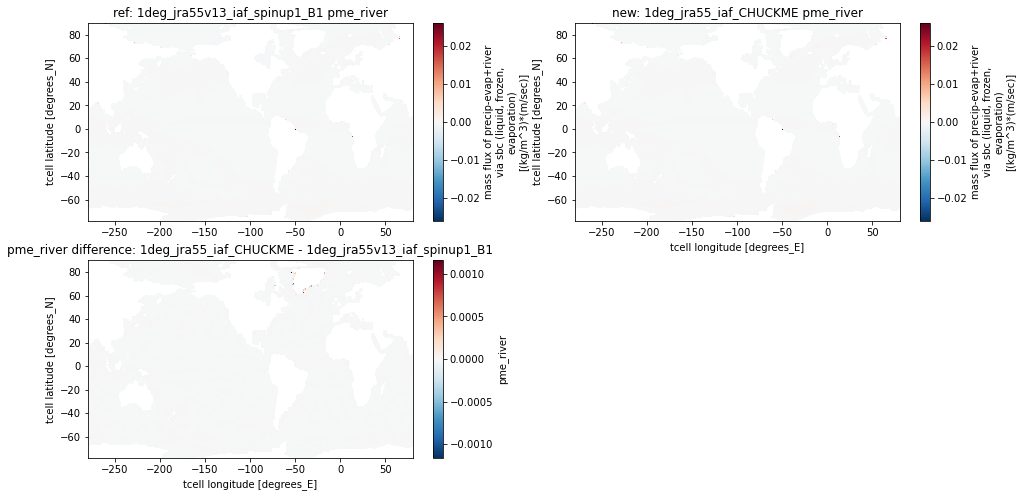

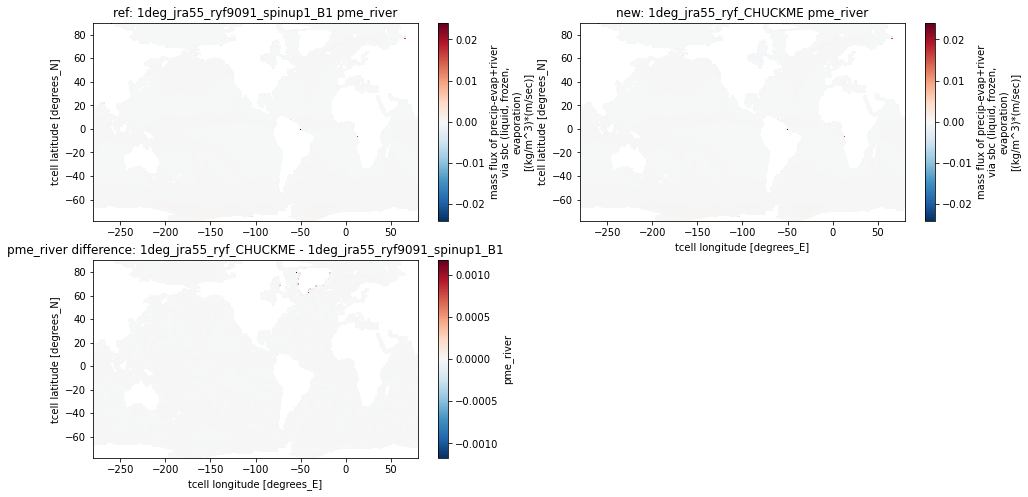

In [14]:
for i,ekey in enumerate(exptdata.exptdict.keys()):
    for v in variables2d:
        plt.figure(figsize=(16,8))
        e = exptdata.exptdict[ekey]
        new = e['ocean_month.nc'][v].isel(time=-1)
        ref = e[e['ref']+' '+'ocean_month.nc'][v].sel(time=new.time.max().values, method='nearest')
        diff = new-ref
        
        plt.subplot(2,2,1)
        ref.plot()
        plt.title('ref: '+e['ref']+' '+v)
        plt.xlabel('')

        plt.subplot(2,2,2)
        new.plot()
        plt.title('new: '+e['desc']+' '+v)

        plt.subplot(2,2,3)
        diff.plot()
        plt.title(v+' difference: '+e['desc']+' - '+e['ref'])